<a href="https://colab.research.google.com/github/10erick-cpu/Felicidad/blob/main/Felicidad_Encuestas%202010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/10erick-cpu/FELICIDAD.git

Cloning into 'FELICIDAD'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 2.01 MiB | 7.80 MiB/s, done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Librerias Usadas**

In [3]:
import imageio                        #Para leer y guardar imagenes
import numpy as np                    #Operaciones con vectores, matrices, tensores, etc
import matplotlib.pyplot as plt       #Para realizar graficos
import matplotlib.image as plti       #Para guardar imagenes
import pandas as pd                   #Para trabajar con datasets
import holoviews  as hv               #Para graficar la matriz de correlaciones
from IPython.display import display   #Para mostrar las matrices
import seaborn as sns                 #Para graficar histogramas
from holoviews import opts
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline


##################################################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import itertools

####################################################################################

#**Cargamos el dataset - Encuesta - Emociones 2010**

In [5]:
df = pd.read_excel("/content/Encuesta Emociones 2010.xlsx")
df

,Nºencuest,Encuestador,Cuota,Fecha,Barrio,Zona,Esquina,p1.1,p.1Otra1°,p.1.2,...,VAR00002,VAR00003,VAR00004,VAR00005,VAR00006,VAR00007,VAR00008,VAR00009,VAR00010,filter_$
0,1,1.0,1,2010-10-19,15.0,1,Bustamante y Arenales,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,1.0,6,2010-10-21,15.0,1,Juncal y Araoz,6,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,1.0,2,2010-10-22,15.0,1,French y Austria,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1.0,4,2010-10-23,21.0,1,Paraná M.T. Alvear,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,1.0,3,2010-10-15,21.0,1,Cabrera y Bustamante,1,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,5.0,1,2010-11-24,2.0,3,Don Bosco y Quintino Bocayuva,5,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
138,139,11.0,6,2010-11-24,2.0,3,Mario Bravo y Guardia Vieja,1,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
139,140,11.0,9,2010-10-24,9.0,4,Salta y Pavón,3,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
140,141,NaN,9,2010-11-26,6.0,3,Ortiguera y Juan Bautista Alberdi,1,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# **Procesamiento de Datos**

# **Bloques Seleccionados**

Bloque 1. Sensibilidades “cotidianas” (P 1 a P 6)

### **Bloque 2. Trabajo, Sensaciones y Emociones (P 7 a P 15)**

Bloque 3. Violencia e interrelación (P 16 a P 20)

Bloque 4. Medios de comunicación (P 21 a P 24)

Bloque 5. Emociones y Deseo (P 25 a 35)

Bloque 6. Cuerpo(s) y sensación(es) (P 36 a P 52)

Bloque 7. Cuerpo (s) y emociones (P 53 a P 56)

### **Bloque 8. Felicidad (P 57 a 61)**

Bloque 9. Estructura de clase (P 62 a 70)

Datos personales (P 71)

# **Selección de Columnas correspondientes /  Bloques númericos, una sola columna**

In [6]:
df1 = df.iloc[:, [*range(25,26),*range(36,37),*range(97,98),*range(130,132),
                  *range(263,264),*range(265,266),*range(266,268),*range(291,295),
                  *range(295,298),*range(319,320),*range(361,362),*range(373,374),*range(383,385),
                  *range(388,389),*range(391,399)]]

df1




###########################################################################


# df1 = df.loc[:, ['p.4','p.7','P.19','P.25','P.26','p.42cod','p.43cod','p.44',
#                           'p.45','p.48','p.49pers','p.49padres','p.49hijos','p.50',
#                           'p.51','p.52','p.55','p.60','P.64','P.67','P.68','P.70',
#                           'EDADCOD','SEXO','ESTADOCI','HIJOS','NºHIJOS','EDUENCUE',
#                           'EDUMADRE','EDUPADRE']]
# df1



################################################################################
# df_filt = df_filt.loc[:, ['p.4','p.7','P.19','P.25','P.26','p.42cod','p.43cod','p.44',
#                           'p.45','p.48','p.49pers','p.49padres','p.49hijos','p.50',
#                           'p.51','p.52','p.55','p.60','P.64','P.67','P.68','P.70',
#                           'EDADCOD','SEXO','ESTADOCI','HIJOS','NºHIJOS','EDUENCUE',
#                           'EDUMADRE','EDUPADRE']]





# ############################################################

# # Only reference - No tener en cuenta 
# # df1 = df.iloc[:,[1,2,3,4,6,7,30,31,[36:37],39,51,52]]
# # df1

# # df1 = df.iloc[0:5, [*range(36,78), *range(0,2)]]
# df1 = df.iloc[:, [*range(36,78), *range(324,368),*range(372,378)]]
# df1

,p.4,p.7,P.19,P.25,P.26,p.42cod,p.43cod,p.44,p.45,p.48,...,P.68,P.70,EDADCOD,SEXO,ESTADOCI,HIJOS,NºHIJOS,EDUENCUE,EDUMADRE,EDUPADRE
0,2,1,1,3,1,99,8,1,0,1,...,8,2,1.0,2,3,1,0.0,7,6,6
1,1,1,1,3,1,6,6,1,0,3,...,5,3,3.0,1,1,2,1.0,6,4,2
2,1,1,1,2,1,99,9,2,1,1,...,8,8,1.0,1,3,1,0.0,9,6,6
3,1,1,1,3,1,1,1,1,0,2,...,10,8,1.0,1,3,1,0.0,6,4,8
4,3,1,1,4,1,2,5,2,1,3,...,11,2,2.0,2,3,1,0.0,8,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2,1,1,3,1,2,96,2,1,2,...,3,2,1.0,2,3,1,NaN,7,6,6
138,2,1,2,2,1,2,3,1,0,2,...,2,3,3.0,1,1,1,NaN,7,4,5
139,2,1,2,2,3,2,10,2,1,96,...,8,7,5.0,2,7,2,2.0,6,5,5
140,1,1,1,3,1,1,99,1,0,2,...,12,2,5.0,2,7,2,2.0,4,3,2


In [ ]:
# df1 = df.iloc[:, [*range(319,320)]]
# df1

# **Filtrado Inicial**

In [7]:
df1 = df1.fillna(df.median()) # Completo valores vacios NAN con la mediana
df_filt = df1.select_dtypes(['number']) # Columnas numericas
df_filt = df_filt.dropna(axis='columns') # Remueve las columnas que contengan un valor faltante

df_filt = df_filt.where(df_filt <= 90, np.nan) # Con esto elimino todos los atipicos (se cuales son porque son mayores a 90 en todos los casos)
df_filt  = df_filt .fillna(df_filt.median())  #Completo los valores NaN (anteriormente atipicos) por la mediana


# # df_filt = df_filt.drop(['P.62.1','EDAD','Nºencuest','filter_$'], axis = 1) #Elimino columnas que no aportan nada

df_filt



<ipython-input-7-79ebb83fd7bc>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1 = df1.fillna(df.median()) # Completo valores vacios NAN con la mediana
<ipython-input-7-79ebb83fd7bc>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(df.median()) # Completo valores vacios NAN con la mediana


,p.4,p.7,P.19,P.25,P.26,p.42cod,p.43cod,p.44,p.45,p.48,...,P.68,P.70,EDADCOD,SEXO,ESTADOCI,HIJOS,NºHIJOS,EDUENCUE,EDUMADRE,EDUPADRE
0,2.0,1,1.0,3.0,1.0,3.5,8.0,1,0.0,1.0,...,8.0,2,1.0,2,3,1,0.0,7,6,6.0
1,1.0,1,1.0,3.0,1.0,6.0,6.0,1,0.0,3.0,...,5.0,3,3.0,1,1,2,1.0,6,4,2.0
2,1.0,1,1.0,2.0,1.0,3.5,9.0,2,1.0,1.0,...,8.0,8,1.0,1,3,1,0.0,9,6,6.0
3,1.0,1,1.0,3.0,1.0,1.0,1.0,1,0.0,2.0,...,10.0,8,1.0,1,3,1,0.0,6,4,8.0
4,3.0,1,1.0,4.0,1.0,2.0,5.0,2,1.0,3.0,...,11.0,2,2.0,2,3,1,0.0,8,8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2.0,1,1.0,3.0,1.0,2.0,5.0,2,1.0,2.0,...,3.0,2,1.0,2,3,1,2.0,7,6,6.0
138,2.0,1,2.0,2.0,1.0,2.0,3.0,1,0.0,2.0,...,2.0,3,3.0,1,1,1,2.0,7,4,5.0
139,2.0,1,2.0,2.0,3.0,2.0,10.0,2,1.0,2.0,...,8.0,7,5.0,2,7,2,2.0,6,5,5.0
140,1.0,1,1.0,3.0,1.0,1.0,5.0,1,0.0,2.0,...,12.0,2,5.0,2,7,2,2.0,4,3,2.0


In [ ]:
# df2 = df_filt.to_csv('nuevo_dataset.csv', index=False)
# df2

## **Division en bloques según el tipo de variable**

* **Bloque 1: Variables nominales**
* **Bloque 2: Variables categoricas ordinales**

In [8]:
# df_filt = df_filt.loc[:, ['p.4','p.7','P.19','P.25','P.26','p.42cod','p.43cod','p.44',
#                           'p.45','p.48','p.49pers','p.49padres','p.49hijos','p.50',
#                           'p.51','p.52','p.55','p.60','P.64','P.67','P.68','P.70',
#                           'EDADCOD','SEXO','ESTADOCI','HIJOS','NºHIJOS','EDUENCUE',
#                           'EDUMADRE','EDUPADRE']]


df_b1 = df_filt.drop([  'p.45','p.48','p.49pers','p.49padres','p.49hijos',
                        'p.50','p.51','p.52','p.55','P.68','P.70','EDADCOD',
                        'NºHIJOS','EDUENCUE','EDUMADRE','EDUPADRE','p.60'], axis = 1)


df_b1 = df_b1.astype('category')    


                        
df_b2 = df_filt.loc[:, ['p.45','p.48','p.49pers','p.49padres','p.49hijos',
                        'p.50','p.51','p.52','p.55','P.68','P.70','EDADCOD',
                        'NºHIJOS','EDUENCUE','EDUMADRE','EDUPADRE','p.60']]


#Hago one hot encoding a las variables nominales --> El One-Hot Encoding es una técnica de preprocesamiento de datos 
#que se utiliza para transformar variables categóricas (o de texto) en variables numéricas. 
#Consiste en crear columnas binarias para cada categoría de la variable original, 
#asignando 1 a la columna correspondiente a la categoría presente en la fila y 0 a todas las demás columnas.

one_hot = pd.get_dummies(df_b1)

#Uno los dos bloques

df_filt1 = pd.concat([one_hot, df_b2], axis=1)
df_filt1.shape

df_filt1

,p.4_1.0,p.4_2.0,p.4_3.0,p.7_1,p.7_2,P.19_1.0,P.19_2.0,P.25_1.0,P.25_2.0,P.25_3.0,...,p.52,p.55,P.68,P.70,EDADCOD,NºHIJOS,EDUENCUE,EDUMADRE,EDUPADRE,p.60
0,0,1,0,1,0,1,0,0,0,1,...,7,2,8.0,2,1.0,0.0,7,6,6.0,1.0
1,1,0,0,1,0,1,0,0,0,1,...,7,3,5.0,3,3.0,1.0,6,4,2.0,2.0
2,1,0,0,1,0,1,0,0,1,0,...,8,2,8.0,8,1.0,0.0,9,6,6.0,2.0
3,1,0,0,1,0,1,0,0,0,1,...,7,2,10.0,8,1.0,0.0,6,4,8.0,2.0
4,0,0,1,1,0,1,0,0,0,0,...,6,3,11.0,2,2.0,0.0,8,8,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,1,0,1,0,1,0,0,0,1,...,5,2,3.0,2,1.0,2.0,7,6,6.0,2.0
138,0,1,0,1,0,0,1,0,1,0,...,7,3,2.0,3,3.0,2.0,7,4,5.0,2.0
139,0,1,0,1,0,0,1,0,1,0,...,5,4,8.0,7,5.0,2.0,6,5,5.0,2.0
140,1,0,0,1,0,1,0,0,0,1,...,8,4,12.0,2,5.0,2.0,4,3,2.0,2.0


## **Matriz de correlacion**

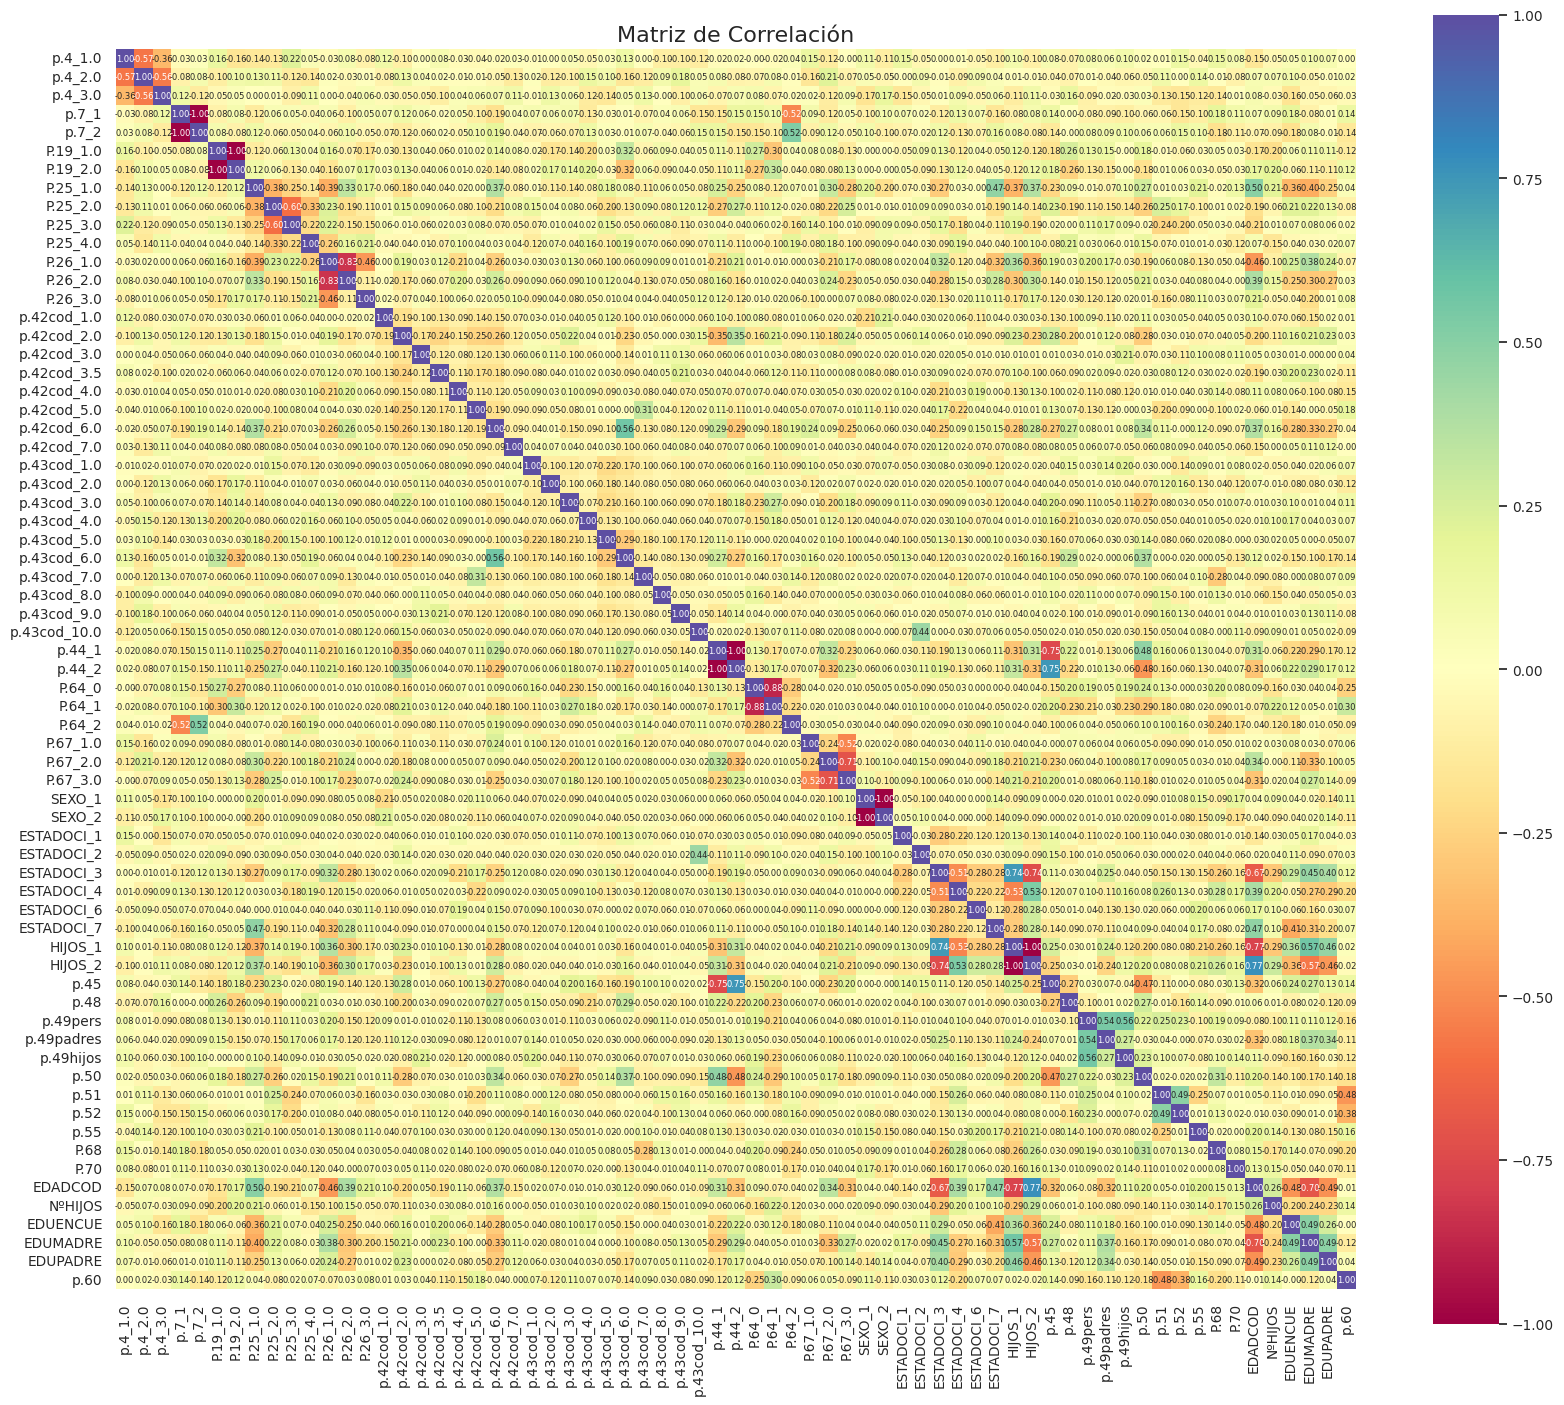

In [9]:
###################################################################################
corr =  df_filt1.corr()

# Configuración del tamaño de la figura y la fuente
plt.figure(figsize=(20,17))
sns.set(font_scale=0.9)

# Genera el heatmap de la matriz de correlación mutua
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
            annot_kws={'size':6}, cmap='Spectral', vmin=-1, vmax=1)

# Etiquetas de los ejes
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Título del gráfico
plt.title('Matriz de Correlación',fontsize=16)

# Mostrar el gráfico
plt.show()


###############################################################################
# Codigo Inicial
# corr =  df_filt1.corr()

# # Establecer tamaños de fuente y tamaño de valores numéricos
# # sns.set(font_scale=10.2)
# # sns.set(rc={'figure.figsize':(200,150)})
# sns.set(font_scale=14, rc={'figure.figsize':(250,200)})
# annot_kws={"fontsize":50}

# # Visualizar la matriz de correlación con el mapa de calor de Seaborn
# plt.figure(figsize=(250,200))
# heatmap = sns.heatmap(corr, annot=True, fmt=".3f", cmap='Spectral',annot_kws=annot_kws)

# # # ajustar las etiquetas del eje X
# etiquetas_x = heatmap.get_xticklabels()
# heatmap.set_xticklabels(etiquetas_x, rotation=45, ha='right')


# # # personalizar el mapa de calor
# heatmap.set_title("Matriz de correlación",fontsize=200)
# # heatmap.set_xlabel("Características")
# # heatmap.set_ylabel("Características")


# plt.show()


# **Umbral de correlación mínima deseada**

In [10]:
corr = df_filt1.corr().values
threshold = 0  # establece el umbral de correlación mínima deseado
corr_abs = np.abs(corr)  # calcula la matriz de correlación con valores absolutos
corr_thresh = np.ma.masked_less_equal(corr_abs, threshold)  # establece las celdas con una correlación menor o igual al umbral a NaN
sign_corr = np.sign(corr)  # obtiene el signo de la correlación

# multiplica la matriz de correlación con el signo de correlación para obtener la matriz con signos
corr_signed = np.multiply(corr_thresh, sign_corr)

# convierte la matriz de correlación con signos en un DataFrame de pandas con etiquetas de fila y columna
corr_df = pd.DataFrame(corr_signed, index=df_filt1.columns, columns=df_filt1.columns)


# muestra el DataFrame de pandas
# establece las opciones de visualización para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# muestra el DataFrame de pandas completo
display(corr_df)

,p.4_1.0,p.4_2.0,p.4_3.0,p.7_1,p.7_2,P.19_1.0,P.19_2.0,P.25_1.0,P.25_2.0,P.25_3.0,P.25_4.0,P.26_1.0,P.26_2.0,P.26_3.0,p.42cod_1.0,p.42cod_2.0,p.42cod_3.0,p.42cod_3.5,p.42cod_4.0,p.42cod_5.0,p.42cod_6.0,p.42cod_7.0,p.43cod_1.0,p.43cod_2.0,p.43cod_3.0,p.43cod_4.0,p.43cod_5.0,p.43cod_6.0,p.43cod_7.0,p.43cod_8.0,p.43cod_9.0,p.43cod_10.0,p.44_1,p.44_2,P.64_0,P.64_1,P.64_2,P.67_1.0,P.67_2.0,P.67_3.0,SEXO_1,SEXO_2,ESTADOCI_1,ESTADOCI_2,ESTADOCI_3,ESTADOCI_4,ESTADOCI_6,ESTADOCI_7,HIJOS_1,HIJOS_2,p.45,p.48,p.49pers,p.49padres,p.49hijos,p.50,p.51,p.52,p.55,P.68,P.70,EDADCOD,NºHIJOS,EDUENCUE,EDUMADRE,EDUPADRE,p.60
p.4_1.0,1.000000,-0.571323,-0.358824,-0.031184,0.031184,0.161568,-0.161568,-0.144124,-0.133650,0.222638,0.051024,-0.027117,0.079663,-0.078706,0.120247,-0.096307,0.003352,0.075355,-0.026667,-0.039009,-0.017935,0.031184,-0.014171,0.003352,0.051024,-0.047890,0.029858,0.125129,0.003352,-0.102912,-0.104203,-0.115478,-0.020639,0.020639,-0.002244,-0.016864,0.038621,0.151471,-0.124249,-0.000458,0.105581,-0.105581,0.154529,-0.050906,0.000458,0.010459,-0.052482,-0.104234,0.097839,-0.097839,0.076267,-0.072304,0.079829,0.059711,0.100131,0.019991,0.005810,0.146155,-0.039544,0.151349,0.079243,-0.153511,-0.046318,0.050618,0.099712,0.070800,0.004945
p.4_2.0,-0.571323,1.000000,-0.561065,-0.081978,0.081978,-0.102090,0.102090,0.125771,0.110570,-0.121469,-0.141243,0.021403,-0.032627,0.013787,-0.075980,0.130168,0.042736,0.022847,-0.014271,-0.014826,-0.049836,-0.128399,0.020108,-0.115574,-0.095347,0.152103,0.097839,-0.155664,-0.115574,0.094868,0.180938,0.049049,0.076542,-0.076542,-0.067463,0.075587,-0.014271,-0.155318,0.212308,-0.074399,0.054518,-0.054518,-0.003555,0.089101,-0.012197,-0.090108,0.088236,0.042340,0.010945,-0.010945,-0.041091,-0.074566,0.006000,-0.038774,-0.061948,-0.047731,0.111092,0.001565,0.143058,-0.007022,-0.082933,0.068746,0.069534,0.099428,-0.047670,-0.013307,0.024118
p.4_3.0,-0.358824,-0.561065,1.000000,0.124684,-0.124684,-0.046850,0.046850,0.002323,0.009047,-0.086404,0.109173,0.003009,-0.043240,0.063702,-0.034868,-0.050905,-0.051985,-0.101986,0.043126,0.056205,0.074767,0.114575,-0.008576,0.128060,0.056976,-0.124684,-0.141386,0.050832,0.128060,-0.004097,-0.100682,0.060687,-0.066234,0.066234,0.078988,-0.068956,-0.022722,0.023871,-0.116140,0.085076,-0.168490,0.168490,-0.151812,-0.049992,0.013409,0.091930,-0.047418,0.056976,-0.111127,0.111127,-0.030190,0.157728,-0.087338,-0.016127,-0.030537,0.034121,-0.132205,-0.149190,-0.122816,-0.144662,0.014395,0.076644,-0.032365,-0.164131,-0.046354,-0.056274,-0.032416
p.7_1,-0.031184,-0.081978,0.124684,1.000000,-1.000000,-0.081978,0.081978,-0.123105,0.061194,0.053709,-0.041707,0.058484,-0.097695,0.051321,0.069465,0.122407,0.060865,-0.015591,0.054639,-0.103561,-0.185506,0.044118,0.074848,0.060865,0.072185,-0.129902,-0.031184,0.008924,-0.070087,0.035760,0.057812,-0.149805,-0.154845,0.154845,0.152103,0.103316,-0.520081,0.087503,-0.123561,0.045400,-0.100586,0.100586,0.072185,0.017689,-0.117031,0.131533,0.072185,-0.155600,-0.081978,0.081978,0.135356,0.003600,-0.083374,-0.087313,-0.104947,-0.057531,-0.056628,-0.154141,-0.104982,0.180061,0.107354,0.066951,0.093272,0.181227,-0.078947,0.012670,0.142453
p.7_2,0.031184,0.081978,-0.124684,-1.000000,1.000000,0.081978,-0.081978,0.123105,-0.061194,-0.053709,0.041707,-0.058484,0.097695,-0.051321,-0.069465,-0.122407,-0.060865,0.015591,-0.054639,0.103561,0.185506,-0.044118,-0.074848,-0.060865,-0.072185,0.129902,0.031184,-0.008924,0.070087,-0.035760,-0.057812,0.149805,0.154845,-0.154845,-0.152103,-0.103316,0.520081,-0.087503,0.123561,-0.045400,0.100586,-0.100586,-0.072185,-0.017689,0.117031,-0.131533,-0.072185,0.155600,0.081978,-0.081978,-0.135356,-0.003600,0.083374,0.087313,0.104947,0.057531,0.056628,0.154141,0.104982,-0.180061,-0.107354,-0.066951,-0.093272,-0.181227,0.078947,-0.012670,-0.142453
P.19_1.0,0.161568,-0.102090,-0.046850,-0.081978,0.081978,1.000000,-1.000000,-0.122853,-0.058864,0.129419,0.042340,0.157999,-0.070917,-0.169758,-0.028659,-0.129254,0.042

# **Fila Correspondiente - Variable Objetivo**

In [11]:
# selecciona solo la fila correspondiente a la variable objetivo
corr_row = corr_df.loc["p.60",:]
corr_row = corr_row.sort_values(ascending=False)

# muestra la fila seleccionada
corr_row.head(20)

p.60           1.000000
P.64_1         0.298784
p.42cod_5.0    0.178196
p.55           0.160849
p.7_1          0.142453
p.45           0.140465
NºHIJOS        0.137946
p.44_2         0.121246
ESTADOCI_3     0.117682
P.19_2.0       0.117401
p.43cod_3.0    0.111685
SEXO_1         0.108600
p.43cod_7.0    0.094170
P.26_3.0       0.079404
p.43cod_1.0    0.071119
p.43cod_5.0    0.068776
p.43cod_4.0    0.068259
ESTADOCI_6     0.065716
ESTADOCI_7     0.065716
P.25_4.0       0.065716
Name: p.60, dtype: float64

#**Análisis combinaciones de variables predictoras - Recomendación Claudio**

# **Training Models**

# **Random Forest**

In [12]:
df_pca = df_filt1 #Solo para no modificar el codigo


y = df_pca['p.60'] #Target

variables = ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3',
             'P.19_2.0', 'p.43cod_3.0', 'SEXO_1', 'p.43cod_7.0', 'P.26_3.0', 'p.43cod_1.0', 'p.43cod_5.0',
             'p.43cod_4.0', 'ESTADOCI_6', 'ESTADOCI_7', 'P.25_4.0']

variables_predictoras = []

for i in range(len(variables)):
    variables_predictoras.append(variables[:i+1])

# print(variables_predictoras)

for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    #Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo
     # Dividir el conjunto de datos en entrenamiento y prueba
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46) 


    # Entrenamiento del modelo

    modelo = RandomForestRegressor()  # Crear un nuevo modelo de regresión
    
    modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

    # Score del modelo
    score = modelo.score(xtest, ytest)  # Calcular el puntaje del modelo
    
    print("Variables predictoras:", variables)
    print("Score:", score)
    print()


Variables predictoras: ['P.64_1']
Score: 0.007051341201476213

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Score: 0.06559337596422576

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Score: 0.07528179464100615

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Score: 0.14876513663190705

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Score: 0.18051744160519523

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS']
Score: 0.12341462636648826

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2']
Score: 0.13333750059252836

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3']
Score: 0.06253841605619581

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3', 'P.19_2.0']
Score: -0.015487237150902944

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55'

# **Regresion Lineal**

In [13]:
for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo
    # Dividir el conjunto de datos en entrenamiento y prueba
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46)

    # Entrenamiento del modelo
    modelo = LinearRegression()  # Crear un nuevo modelo de regresión lineal
    modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

    # Score del modelo
    score = modelo.score(xtest, ytest)  # Calcular el puntaje del modelo

    print("Variables predictoras:", variables)
    print("Score:", score)
    print()

Variables predictoras: ['P.64_1']
Score: 0.006014264592659524

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Score: 0.07262555768926227

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Score: 0.07135814323535838

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Score: 0.12129122014302995

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Score: 0.12762987606464204

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS']
Score: 0.12330664117155199

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2']
Score: 0.1338795363903118

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3']
Score: 0.17491886428433867

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3', 'P.19_2.0']
Score: 0.1677085848758848

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p

# **Predictores con k-fold - Regresion Lineal**

In [14]:
for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Separar el dataset en K-Fold cross-validation
    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    scores = []  # Lista para almacenar los scores de cada fold

    for train_index, test_index in kf.split(x):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        # Entrenar el modelo
        modelo = LinearRegression()  # Crear un nuevo modelo de regresión lineal
        modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

        # Calcular el puntaje del modelo en los datos de prueba
        score = modelo.score(xtest, ytest)
        scores.append(score)

    # Calcular el promedio de los scores
    avg_score = sum(scores) / len(scores)

    print("Variables predictoras:", variables)
    print("Scores :" , scores)
    print("Average Score:", avg_score)
    print()

Variables predictoras: ['P.64_1']
Scores : [0.1439831014607762, 0.1121505458626667, -0.08583084601175694, -0.09846220262818761, 0.11037877945472752]
Average Score: 0.03644387562764517

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Scores : [0.19942801786257824, 0.18656740829568363, -0.03360081385044955, -0.03658070383996104, 0.034207219106935915]
Average Score: 0.07000422551495744

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Scores : [0.20531565200906576, 0.23265160449710853, 0.013351707292041604, -0.006372389108974197, 0.031056241271347096]
Average Score: 0.09520056319211775

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Scores : [0.17726236100007886, 0.19961639361766115, 0.03035016043710148, -0.007481476272934051, 0.08957340277325176]
Average Score: 0.09786416831103184

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Scores : [0.13373790045617162, 0.20540546348215538, 0.03471005098021562, 0.0003890297812011445, 0.085482779

# **Predictores con k-fold - Random Forest**

In [15]:
for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Separar el dataset en K-Fold cross-validation
    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    scores = []  # Lista para almacenar los scores de cada fold

    for train_index, test_index in kf.split(x):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        # Entrenar el modelo
        modelo = RandomForestRegressor()  # Crear un nuevo modelo de Random Forest
        modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

        # Calcular el puntaje del modelo en los datos de prueba
        score = modelo.score(xtest, ytest)
        scores.append(score)

    # Calcular el promedio de los scores
    avg_score = sum(scores) / len(scores)

    print("Variables predictoras:", variables)
    print("Scores :" , scores)
    print("Average Score:", avg_score)
    print()

Variables predictoras: ['P.64_1']
Scores : [0.14904942926592413, 0.11052693455387419, -0.07986723663900896, -0.11341930306058967, 0.10915275021485882]
Average Score: 0.0350885148670117

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Scores : [0.21966236924050275, 0.20484363736346423, -0.0619732625481626, -0.026144503178223477, 0.03429432767716056]
Average Score: 0.07413651371094829

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Scores : [0.04402047915485674, 0.236362547797341, -0.3130713822027993, -0.08549716186961809, -0.024388234080498172]
Average Score: -0.02851475024014356

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Scores : [-0.16259478284937745, 0.27153762062506215, -0.3858479205352918, -0.09461995828121461, -0.07284311439168079]
Average Score: -0.08887363108650051

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Scores : [-0.041258934748055864, 0.18550354553291226, -0.29826658098114933, -0.15926714580027435, -0.110313

# **kNN (k-Nearest Neighbors)** 

In [ ]:
for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo
    # Dividir el conjunto de datos en entrenamiento y prueba
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46)

    # Entrenamiento del modelo
    modelo = KNeighborsRegressor()  # Crear un nuevo modelo de KNN
    modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

    # Score del modelo
    score = modelo.score(xtest, ytest)  # Calcular el puntaje del modelo

    print("Variables predictoras:", variables)
    print("Score:", score)
    print()

Variables predictoras: ['P.64_1']
Score: -0.017959183673469825

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Score: 0.07673469387755072

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Score: -0.03571428571428603

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Score: 0.011632653061224296

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Score: 0.03530612244897913

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS']
Score: -0.04163265306122477

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2']
Score: -0.04163265306122477

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3']
Score: -0.11857142857142877

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3', 'P.19_2.0']
Score: -0.16000000000000036

Variables predictoras: ['P.64_1', 'p.42cod_5.0', '

# **kNN (k-Nearest Neighbors) /  k-Fold**
 
 Se realiza la validación cruzada con k-fold y se calcula el promedio de los scores obtenidos en los folds. Cada fold se entrena y se evalúa con el algoritmo kNN.

In [16]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

df_pca = df_filt1
y = df_pca['p.60'] # Target

variables = ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3',
             'P.19_2.0', 'p.43cod_3.0', 'SEXO_1', 'p.43cod_7.0', 'P.26_3.0', 'p.43cod_1.0', 'p.43cod_5.0',
             'p.43cod_4.0', 'ESTADOCI_6', 'ESTADOCI_7', 'P.25_4.0']

variables_predictoras = []

for i in range(len(variables)):
    variables_predictoras.append(variables[:i+1])

# Inicializar el modelo
modelo = KNeighborsRegressor()

for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Inicializar k-fold cross validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    scores = []  # Almacenar los scores obtenidos en cada fold

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Entrenar el modelo
        modelo.fit(x_train, y_train)

        # Calcular el score del modelo
        score = modelo.score(x_test, y_test)
        scores.append(score)

    avg_score = sum(scores) / len(scores)  # Calcular el promedio de los scores obtenidos en los folds
    
    print("Variables predictoras:", variables)
    print("Average Score:", avg_score)
    # print("Score:",scores)
    print()


Variables predictoras: ['P.64_1']
Average Score: -0.006918313736978066

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Average Score: 0.012871426082394577

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Average Score: -0.19309446670746977

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Average Score: -0.20455788099397115

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Average Score: -0.0318613365601423

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS']
Average Score: -0.08698627606279088

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2']
Average Score: -0.0936643810102457

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3']
Average Score: -0.11280076411213089

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3', 'P.19_2.0']
Average Score: 

# **Gradient Boost**

In [17]:
for variables in variables_predictoras:
    x = df_pca.loc[:, variables]  # Seleccionar las variables predictoras correspondientes

    # Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo
    # Dividir el conjunto de datos en entrenamiento y prueba
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46)

    # Entrenamiento del modelo
    modelo = GradientBoostingRegressor()  # Crear un nuevo modelo de regresión con Gradient Boosting
    modelo.fit(xtrain, ytrain)  # Entrenar el modelo con los datos de entrenamiento

    # Score del modelo
    score = modelo.score(xtest, ytest)  # Calcular el puntaje del modelo

    print("Variables predictoras:", variables)
    print("Score:", score)
    print()

Variables predictoras: ['P.64_1']
Score: 0.006016687930940234

Variables predictoras: ['P.64_1', 'p.42cod_5.0']
Score: 0.05743881089366343

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55']
Score: 0.09032507677204338

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1']
Score: 0.13404034787500307

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45']
Score: 0.0793774682764602

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS']
Score: 0.08080152014857789

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2']
Score: 0.073577978134442

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3']
Score: -0.38684792582596383

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', 'p.7_1', 'p.45', 'NºHIJOS', 'p.44_2', 'ESTADOCI_3', 'P.19_2.0']
Score: -0.21445127466761083

Variables predictoras: ['P.64_1', 'p.42cod_5.0', 'p.55', '

####################### **Aqui termina** ##################################


# **NO CONSIDERAR**


# **Analisis Inicial  Considerando todas las variables predictoras**

# **Training Models**

In [ ]:
df_pca = df_filt1 #Solo para no modificar el codigo

# **Random Forest**

In [ ]:
# P.60. Teniendo en cuenta todo, en general Ud. diría que es:
# 1. Muy feliz
# 2. Bastante feliz
# 3. No muy feliz
# 4. Nada feliz

# y = df_pca['p.60'] #Target
# x = df_pca.drop(columns = 'p.60', axis = 1) #Specs


y = df_pca['p.60'] #Target
x = df_pca.drop(columns = 'p.60', axis = 1) #Specs



# y = df_pca['p.60'] #Target
# x = df_pca.loc[:, ['P.64_1',]]


#### **Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46)

#### **Entrenamiento del modelo**

In [ ]:
modelo1 = RandomForestRegressor()    # Cargar el tipo de modelo a usar
modelo1.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

RandomForestRegressor()

#### **Score del modelo**


In [ ]:
score1 = modelo1.score(xtest, ytest)    
print("Score:", score1)
print()

Score: 0.008124718859495172



# **Comentario**

Un **score de 0.1306** para el coeficiente de determinación (R²) indica que el modelo explica aproximadamente el 13.1% de la variabilidad en los datos. Este resultado puede considerarse relativamente bajo, lo que sugiere que el modelo no está capturando todas las relaciones entre las variables de entrada y la variable objetivo.

En general, un buen resultado de R² depende del contexto y la naturaleza del problema. Sin embargo, en muchos casos, se espera que un modelo tenga un R² significativamente mayor para considerarse bueno. Por ejemplo, en problemas de regresión, un R² cercano a 1 indica que el modelo es capaz de explicar la mayoría de la variabilidad en los datos.

En este caso, un R² de 0.1306 sugiere que el modelo no está capturando de manera adecuada las relaciones entre las variables de entrada y la variable objetivo. Puede haber varias razones para esto, como la falta de características relevantes, una configuración subóptima del modelo o la necesidad de ajustar los hiperparámetros.

Por lo tanto, es recomendable explorar formas de mejorar el rendimiento del modelo, como probar diferentes algoritmos de regresión, ajustar los hiperparámetros, realizar ingeniería de características, o incluso considerar la adición de más datos si es posible. Estas estrategias pueden ayudarte a obtener un modelo más preciso y con un mejor rendimiento.

**Comentario**

En general, estos resultados indican que el modelo de Random Forest no está capturando bien las relaciones entre las variables de entrada y la variable objetivo en tu conjunto de datos. Sería recomendable explorar otras técnicas de modelado, ajustar los hiperparámetros del modelo o considerar la selección de características para mejorar el rendimiento. También podría ser útil investigar si hay problemas en los datos o si se requiere más preprocesamiento antes de entrenar el modelo.

# **Predictores con k-fold - Regresion Lineal - (Erick)**

kf.split(x) genera automáticamente los índices de los conjuntos de entrenamiento y prueba para cada fold utilizando la función split del objeto KFold. No es necesario proporcionar los valores manualmente.

La función split divide el conjunto de datos en k folds y devuelve los índices de las muestras correspondientes a cada fold. Luego, en cada iteración del bucle for, se utilizan estos índices para extraer los conjuntos de entrenamiento y prueba correspondientes.

**En resumen, al utilizar el objeto KFold, no necesitas proporcionar explícitamente los valores para train_index y test_index. La función split del objeto KFold se encarga de generarlos automáticamente**. 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir el número de folds (k)
k = 6

# Crear los conjuntos de entrenamiento y prueba usando KFold
kf = KFold(n_splits=6, shuffle=True)

# Inicializar una lista para almacenar las métricas de rendimiento de cada fold
mse_scores = []

# Iterar sobre los folds
for train_index, test_index in kf.split(x):
    # Obtener los conjuntos de entrenamiento y prueba para el fold actual
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y ajustar el modelo
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test)

    # Calcular el error cuadrático medio (MSE) del fold actual
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcular la media y desviación estándar de los MSE de todos los folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Imprimir los resultados
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mean_mse)
print("Std MSE:", std_mse)


################################################################################



Mean Squared Error (MSE) scores: [0.35515157449928053, 0.33250541924475696, 0.3234298778309083, 0.3909186261591673, 0.21963461936642434, 0.25846403591230227]
Mean MSE: 0.3133506921688066
Std MSE: 0.05777519513399244


# **Comentario** :

Los resultados indican las métricas de rendimiento (errores cuadráticos medios) obtenidas durante la **validación cruzada k-fold con el modelo de regresión lineal**. Aquí está el análisis de los resultados:

**Mean Squared Error (MSE) scores**: Estos son los errores cuadráticos medios obtenidos en cada fold de la validación cruzada k-fold. 

**Tienes una lista de los MSE para cada fold**: 

[0.2378875989493847, 0.28265809836380973, 0.21502482723971397, 0.33457579794298925, 0.5005711213618436]. 

**El MSE** es una medida del promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales del conjunto de prueba. Un MSE más bajo indica un mejor rendimiento del modelo.

**Mean MSE**: Este es el promedio de los MSE obtenidos en todos los folds. En tu caso, el valor de Mean MSE es 0.31414348877154824. Representa el rendimiento promedio del modelo en términos del MSE en todos los folds. Un valor de MSE más bajo indica un mejor rendimiento del modelo.

**Std MSE**: Esta es la desviación estándar de los MSE obtenidos en todos los folds. 

En este caso, el valor de **Std MSE es 0.10178756412927806**. **La desviación estándar proporciona una medida de la variabilidad o dispersión de los MSE entre los folds**

**Un valor de desviación estándar más bajo indica una menor variabilidad en el rendimiento del modelo en diferentes folds**

**En base a estos resultados, podemos hacer la siguiente interpretación**:

**El valor promedio del MSE** (**Mean MSE**) **es 0.31414348877154824**, **lo que indica que el modelo de regresión lineal tiene un rendimiento aceptable en general**.

**Sin embargo, la desviación estándar del MSE (Std MSE) es relativamente alta, con un valor de 0.10178756412927806** **Esto sugiere una variabilidad considerable en el rendimiento del modelo en diferentes folds**.

**En general, aunque el modelo de regresión lineal muestra un rendimiento aceptable con un MSE promedio de 0.31414348877154824, la alta variabilidad en los resultados entre los folds puede indicar que el modelo no se ajusta de manera consistente a los datos**. 

Sería recomendable considerar otros modelos o métodos y evaluar si cumplen con tus criterios de rendimiento deseado.



# **Predictores con k-fold - Random Forest - (Erick)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir el número de folds (k)
k = 6

# Crear los conjuntos de entrenamiento y prueba usando KFold
kf = KFold(n_splits=6, shuffle=True,random_state=42)

# Inicializar una lista para almacenar las métricas de rendimiento de cada fold
mse_scores = []

# Iterar sobre los folds
for train_index, test_index in kf.split(x):
    # Obtener los conjuntos de entrenamiento y prueba para el fold actual
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y ajustar el modelo Random Forest
    model = RandomForestRegressor()
    model.fit(x_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test)

    # Calcular el error cuadrático medio (MSE) del fold actual
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcular la media y desviación estándar de los MSE de todos los folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Imprimir los resultados
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mean_mse)
print("Std MSE:", std_mse)

############################################################################



Mean Squared Error (MSE) scores: [0.2421333333333333, 0.21046250000000002, 0.14282083333333334, 0.20491250000000003, 0.16820869565217392, 0.19796521739130443]
Mean MSE: 0.19441717995169083
Std MSE: 0.03163882513416641


# **Comentario**

En base a los resultados obtenidos del modelo de Random Forest utilizando la validación cruzada k-fold, podemos hacer la siguiente interpretación:

**Mean Squared Error (MSE) scores**: Estos son los errores cuadráticos medios obtenidos en cada fold de la validación cruzada k-fold. Tienes una lista de los MSE para cada fold: [0.34203793103448277, 0.16379655172413793, 0.15234642857142858, 0.15245, 0.20413214285714285]. **El MSE** es una medida del promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales del conjunto de prueba. Un MSE más bajo indica un mejor rendimiento del modelo.

**Mean MSE**: Este es el promedio de los MSE obtenidos en todos los folds. En este caso, **el valor de Mean MSE es 0.20295261083743843**. Representa el rendimiento promedio del modelo en términos del MSE en todos los folds. Un valor de MSE más bajo indica un mejor rendimiento del modelo.

**Std MSE**: Esta es la desviación estándar de los MSE obtenidos en todos los folds. En tu caso, el valor de Std MSE es 0.07209828561113295. La desviación estándar proporciona una medida de la variabilidad o dispersión de los MSE entre los folds. Un valor de desviación estándar más bajo indica una menor variabilidad en el rendimiento del modelo en diferentes folds.

En base a estos resultados, podemos decir que el modelo de Random Forest tiene un rendimiento aceptable en términos de MSE. 

**El promedio de MSE** **obtenido es relativamente bajo (0.20295261083743843), lo que sugiere que el modelo tiende a realizar predicciones cercanas a los valores reales**. 

**Sin embargo, la desviación estándar del MSE (0.07209828561113295) indica cierta variabilidad en el rendimiento del modelo en diferentes folds**.

**En general, estos resultados indican que el modelo de Random Forest es prometedor y muestra un buen rendimiento en términos de MSE.** 

Sin embargo, para tener una evaluación más completa, es recomendable comparar estos resultados con otros modelos y considerar el contexto y las expectativas específicas del problema en cuestión.

# **Predictores con k-fold - Modelo Random Forest** - (**Facundo**)

In [ ]:
y = df_pca['p.60'] #Target
x = df_pca.drop(columns = 'p.60', axis = 1) #Specs

#Separo 22 datos para el test final
x_test = x.iloc[:22]
x_train_val = x.iloc[22:]
y_test = y.iloc[:22]
y_train_val = y.iloc[22:]

#Hago 6 K-Folds con los 120 datos restantes
kf = KFold(n_splits=6, shuffle=True, random_state=42)

scores = []
models = []

for train_index, val_index in kf.split(x_train_val):
    x_train, x_val = x_train_val.iloc[train_index], x_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    modelo = RandomForestRegressor()      # Cargar el tipo de modelo a usar
    modelo.fit(x_train, y_train)          # Entrenar el modelo con los datos preparados

    score = modelo.score(x_val, y_val)  
    scores.append(score)
    models.append(modelo)

best_model = models[np.argmax(scores)]
test_score = best_model.score(x_test, y_test)

print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Score final: {test_score}")



Scores: [0.23318750000000021, -0.08572549019607822, 0.1698293838862558, -0.10850505050505022, -0.01529999999999987, -0.38712000000000013]
Mean score: -0.03227227613581207
Score final: 0.1774217054263566


**Comentario** :

En base a los resultados obtenidos, podemos hacer la siguiente interpretación:

**Scores**: Estos son los puntajes obtenidos en cada fold de la validación cruzada k-fold. Tienes una lista de los puntajes para cada fold: [0.19268750000000012, -0.14031372549019605, 0.159014218009479, -0.1901616161616162, -0.13770000000000038, -0.3222400000000001]. Los puntajes pueden variar de -infinito a 1, donde un puntaje más alto indica un mejor rendimiento del modelo. En tu caso, algunos de los puntajes son positivos, mientras que otros son negativos.

**Mean score**: Este es el promedio de los puntajes obtenidos en todos los folds. En tu caso, el valor del Mean score es -0.07311893727372226. Este valor representa el rendimiento promedio del modelo en términos de puntaje en todos los folds. Un valor de puntaje más alto indica un mejor rendimiento del modelo. 

Sin embargo, en este caso, el puntaje promedio es negativo, lo que sugiere que el modelo no está teniendo un buen rendimiento en promedio.

**Score final**: Este es el puntaje obtenido en el conjunto de prueba final (los 22 datos separados al principio). En tu caso, el valor del Score final es 0.060139534883721035. 

Este puntaje indica el rendimiento del modelo en el conjunto de prueba final. Un puntaje más alto indica un mejor rendimiento del modelo. Sin embargo, en este caso, el puntaje final es relativamente bajo.

En base a estos resultados, podemos decir que el modelo de Random Forest no está teniendo un buen rendimiento en este caso. 

Tanto el puntaje promedio como el puntaje final son relativamente bajos y, en algunos folds, el modelo incluso obtiene puntajes negativos. 

Esto sugiere que el modelo no está logrando capturar bien la relación entre las características (x) y la variable objetivo (y). 

Puede ser necesario explorar diferentes estrategias, como ajustar los hiperparámetros del modelo, considerar otros modelos o realizar una exploración más profunda de los datos y características para mejorar el rendimiento del modelo.

### **Regresion Lineal**

In [ ]:
y = df_pca['p.60'] #Target
x = df_pca.drop(columns = 'p.60', axis = 1) #Specs

### **Regresion 1**


**Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=46)

**Creo y entreno el modelo**

In [ ]:
modelo2 = LinearRegression()         # Cargar el tipo de modelo a usar
modelo2.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

# Crea un dataframe con los coeficientes de la regresión

coef_df = pd.DataFrame({
    'feature': x.columns,
    'coefficient': modelo2.coef_
})

# Ordena los coeficientes de mayor a menor

coef_df = coef_df.sort_values('coefficient', ascending=False)
score1 = modelo2.score(xtest, ytest)  
# coef_df

#### **Regresion 2 (Con coeficientes mayores a 0.02)**

In [ ]:
# Establece un umbral para los coeficientes
umbral = 0.02

# Filtra el DataFrame para obtener solo los coeficientes que superan el umbral
coef_filtrados = coef_df[abs(coef_df['coefficient']) > umbral]

# Extrae los nombres de las variables seleccionadas
nombres_seleccionados = coef_filtrados['feature'].values

# Filtra las columnas correspondientes de x
x_seleccionado = x[nombres_seleccionados]
xtrain, xtest, ytrain, ytest = train_test_split(x_seleccionado, y, test_size=0.2, random_state=45)

# Realiza una nueva regresión lineal usando solo las variables seleccionadas
reg_seleccionado = LinearRegression().fit(xtrain, ytrain)

# Crea un dataframe con los coeficientes de la regresión
coef_df = pd.DataFrame({
    'feature': x_seleccionado.columns,
    'coefficient': reg_seleccionado.coef_
})

# Ordena los coeficientes de mayor a menor
coef_df = coef_df.sort_values('coefficient', ascending=False)
#coef_df

**Obtengo el score de la red**

In [ ]:
score2 = reg_seleccionado.score(xtest, ytest)  
print("Score:", score1)
print()
print("Score2:", score2)

Score: -0.7364192358362733

Score2: 0.2372097971843291



 ## **Matriz de correlación de las variables seleccionadas**

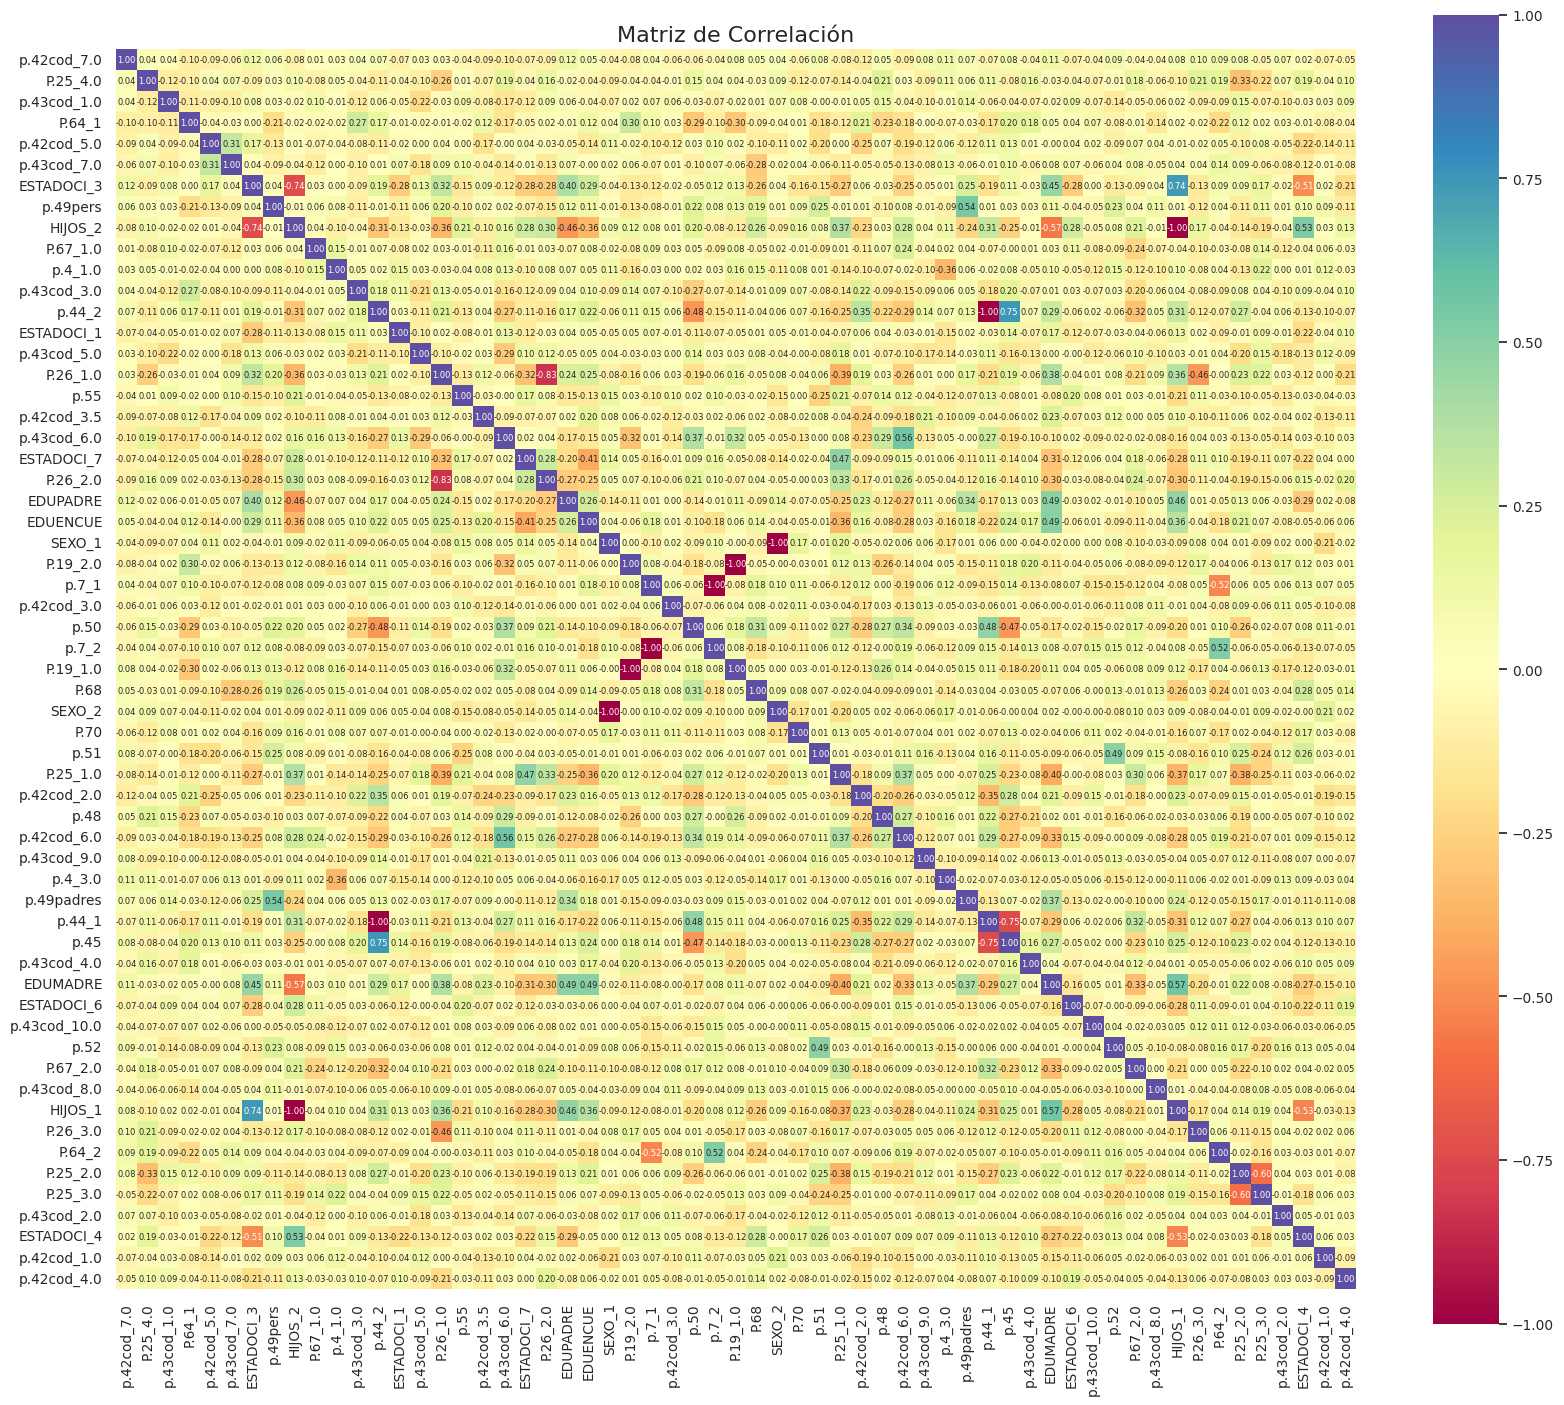

In [ ]:
# Calcula la matriz de correlación mutua de las variables seleccionadas
corr = x_seleccionado.corr()

# Configuración del tamaño de la figura y la fuente
plt.figure(figsize=(20,17))
sns.set(font_scale=0.9)

# Genera el heatmap de la matriz de correlación mutua
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
            annot_kws={'size':6}, cmap='Spectral', vmin=-1, vmax=1)

# Etiquetas de los ejes
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Título del gráfico
plt.title('Matriz de Correlación',fontsize=16)

# Mostrar el gráfico
plt.show()

## **Predictores con k-fold**

In [ ]:
y = df_pca['p.60'] #Target
x = df_pca.drop(columns = 'p.60', axis = 1) #Specs

#Separo 22 datos para el test final
x_test = x.iloc[:22]
x_train_val = x.iloc[22:]
y_test = y.iloc[:22]
y_train_val = y.iloc[22:]

#Hago 6 K-Folds con los 120 datos restantes
kf = KFold(n_splits=6, shuffle=True, random_state=42)

scores = []
models = []

for train_index, val_index in kf.split(x_train_val):
    x_train, x_val = x_train_val.iloc[train_index], x_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    modelo = LinearRegression()           # Cargar el tipo de modelo a usar
    modelo.fit(x_train, y_train)          # Entrenar el modelo con los datos preparados

    score = modelo.score(x_val, y_val)  
    scores.append(score)
    models.append(modelo)

best_model = models[np.argmax(scores)]
test_score = best_model.score(x_test, y_test)

print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Score final: {test_score}")

Scores: [-0.3333944445854158, -1.7293905532602096, 0.20770645099824603, -0.10103850605552811, -2.177004863792414, -0.9567378951692294]
Mean score: -0.8483099686440919
Score final: -0.48007557258164724


### **Gradient Boost**


In [ ]:
y = df_pca['p.60'] #Target
x = df_pca.drop(columns = 'p.60', axis = 1) #Specs


# Separo 22 datos para el test final
x_test = x.iloc[:22]
x_train_val = x.iloc[22:]
y_test = y.iloc[:22]
y_train_val = y.iloc[22:]

#Hago 6 K-Folds con los 120 datos restantes
kf = KFold(n_splits=6, shuffle=True, random_state=42)

scores = []
models = []

for train_index, val_index in kf.split(x_train_val):
    x_train, x_val = x_train_val.iloc[train_index], x_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    modelo = GradientBoostingRegressor()    # Cargar el tipo de modelo a usar
    modelo.fit(x_train, y_train)            # Entrenar el modelo con los datos preparados

    score = modelo.score(x_val, y_val)  
    scores.append(score)
    models.append(modelo)

best_model = models[np.argmax(scores)]
test_score = best_model.score(x_test, y_test)

print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Score final: {test_score}")

Scores: [0.06848003654110246, -0.6623628730964592, 0.22862901970558147, -0.014632460529360847, -0.5434019811914281, -0.5476941320244941]
Mean score: -0.24516373176584305
Score final: 0.07916181409727452
